# EDA2

DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

Objective:

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

Dataset:

Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
    
Tasks:

1. Data Exploration and Preprocessing:

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

•	Handle missing values as per the best practices (imputation, removal, etc.).

•	Apply scaling techniques to numerical features:

•	Standard Scaling

•	Min-Max Scaling

•	Discuss the scenarios where each scaling technique is preferred and why.

2. Encoding Techniques:

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

•	Use Label Encoding for categorical variables with more than 5 categories.

•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

3. Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

4. Feature Selection:

•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


# Data Exploration and Preprocessing

In [1]:
import pandas as pd
df=pd.read_csv("C:\\DS assignments\\adult_with_headers.csv")
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
 #Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

# Display the first five rows of the dataset
print(df.head())

# Print the summary statistics of the dataset
print(df.describe())

# Check for missing values in the dataset
print(df.isnull().sum())

# Print the data types of each column in the dataset
print(df.dtypes)


   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [3]:
# Handle missing values as per the best practices (imputation, removal, etc.).

# Check for the percentage of missing values in each column
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Select only numeric columns for mean imputation
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle missing values in non-numeric columns (e.g., using mode for categorical)
# ... your code for handling non-numeric missing values ...

# Check for remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [4]:
#•	Apply scaling techniques to numerical features:
# •	Standard Scaling
# •	Min-Max Scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Min-Max Scaling
scaler = MinMaxScaler()
minmax_scaled_data = scaler.fit_transform(df[numeric_columns])


In [5]:
scaled_data

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [6]:
minmax_scaled_data

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [23]:
#Discuss the scenarios where each scaling technique is preferred and why.


Standard scaling is preferred when:

- The data is normally distributed.
- The features have different units of measurement.
- The goal is to standardize the data so that it has a mean of 0 and a standard deviation of 1.

Min-max scaling is preferred when:

- The data is not normally distributed.
- The features have different ranges of values.
- The goal is to scale the data so that all features lie between 0 and 1.

Example:

Suppose we have a dataset with two features: age and income. The age feature is normally distributed with a mean of 30 and a standard deviation of 5. The income feature is not normally distributed and has a range of values from 0 to 100,000.

If we were to use standard scaling, the age feature would be scaled to have a mean of 0 and a standard deviation of 1. The income feature would also be scaled, but the scaling would be different because the income feature is not normally distributed.

If we were to use min-max scaling, both the age and income features would be scaled to lie between 0 and 1. This would be useful if we were going to use a machine learning algorithm that is sensitive to the range of values of the input features.


# Encoding Techniques

In [22]:
# Apply One-Hot Encoding to categorical variables with less than 5 categories.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns with less than 5 categories
categorical_cols = df.select_dtypes(include='object').columns
low_cardinality_cols = [cname for cname in categorical_cols if df[cname].nunique() < 5]

# Create OneHotEncoder instance
OH_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform low cardinality categorical columns
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df[low_cardinality_cols]))

# One-hot encoding removes index; put it back
OH_cols_train.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = df.drop(low_cardinality_cols, axis=1)

# Combine one-hot encoded columns with numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)

# View the transformed data
OH_X_train.head()


,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,years_of_experience,log_capital_gain,education_ 10th,...,education_occupation_ Some-college_ Handlers-cleaners,education_occupation_ Some-college_ Machine-op-inspct,education_occupation_ Some-college_ Other-service,education_occupation_ Some-college_ Priv-house-serv,education_occupation_ Some-college_ Prof-specialty,education_occupation_ Some-college_ Protective-serv,education_occupation_ Some-college_ Sales,education_occupation_ Some-college_ Tech-support,education_occupation_ Some-college_ Transport-moving,0
0,39,7,77516,13,2174,0,40,30.000000,7.684784,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,50,6,83311,13,0,0,13,12.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,38,4,215646,9,0,0,40,29.230769,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,53,4,234721,7,0,0,40,40.769231,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,28,4,338409,13,0,0,40,21.538462,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [9]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns with more than 5 categories
high_cardinality_cols = [cname for cname in categorical_cols if df[cname].nunique() > 5]

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each high cardinality column separately
label_encoded_cols = pd.DataFrame()
for col in high_cardinality_cols:
    label_encoded_cols[col] = label_encoder.fit_transform(df[col])

# One-hot encoding removes index; put it back
label_encoded_cols.index = df.index

# Remove categorical columns (will replace with label encoding)
num_X_train = df.drop(high_cardinality_cols, axis=1)

# Combine label encoded columns with numerical features
label_encoded_X_train = pd.concat([num_X_train, label_encoded_cols], axis=1)

# Ensure all columns have string type
label_encoded_X_train.columns = label_encoded_X_train.columns.astype(str)

# View the transformed data
label_encoded_X_train.head()

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,income,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,White,Male,2174,0,40,<=50K,7,9,4,1,1,39
1,50,83311,13,White,Male,0,0,13,<=50K,6,9,2,4,0,39
2,38,215646,9,White,Male,0,0,40,<=50K,4,11,0,6,1,39
3,53,234721,7,Black,Male,0,0,40,<=50K,4,1,2,6,0,39
4,28,338409,13,Black,Female,0,0,40,<=50K,4,9,2,10,5,5


In [24]:
#Discuss the pros and cons of One-Hot Encoding and Label Encoding.


Pros of One-Hot Encoding:

1. Easy to understand and interpret:
    
One-hot encoding is a simple and straightforward method that creates new binary features for each category in a categorical variable. This makes it easy to understand how the categorical variable is represented in the data.

2. Works well with machine learning algorithms:

Many machine learning algorithms, such as linear regression and logistic regression, expect input features to be numeric. One-hot encoding converts categorical variables into numeric features that can be used by these algorithms.

3. Captures all possible categories:

One-hot encoding creates a new binary feature for each category in a categorical variable, even if some categories are not present in the training data. This ensures that all possible categories are represented in the data, which can be important for some machine learning algorithms.

Cons of One-Hot Encoding:

1. High dimensionality:
                                                                                                                                                                                                                              
One-hot encoding can lead to high dimensionality, especially when there are many categories in a categorical variable. This can increase the computational cost of training machine learning models and can also lead to overfitting.

2. Not suitable for ordinal data:
                                                                                                                                                                                                                              
One-hot encoding does not take into account the order of categories in a categorical variable. This can be a problem for ordinal data, where the order of categories is meaningful.

Pros of Label Encoding:

1. Low dimensionality:
    
Label encoding does not increase the dimensionality of the data, as it simply replaces each category with a numeric value. This can be advantageous when there are many categories in a categorical variable.

2. Suitable for ordinal data:
    
Label encoding takes into account the order of categories in a categorical variable. This can be useful for ordinal data, where the order of categories is meaningful.

3. Computationally efficient:
                                                                                                
Label encoding is computationally efficient, as it simply requires replacing each category with a numeric value. This can be important for large datasets.

Cons of Label Encoding:

1. Can introduce bias:
                                                                                                                         
Label encoding can introduce bias into the data, as it assumes that the categories in a categorical variable have a natural ordering. This can be a problem for categorical variables where the order of categories is not meaningful.

2. Not suitable for many machine learning algorithms:
               
Many machine learning algorithms, such as linear regression and logistic regression, expect input features to be numeric. Label encoding does not convert categorical variables into numeric features that can be used by these algorithms.


# Feature Engineering

In [11]:
#Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

# Create a new feature that combines education and occupation
df['education_occupation'] = df['education'] + '_' + df['occupation']

# Rationale: This new feature captures the relationship between education and occupation, which could be useful for predicting income. For example, someone with a high level of education and a high-paying occupation is more likely to have a high income than someone with a low level of education and a low-paying occupation.

# Create a new feature that calculates the number of years of work experience
df['years_of_experience'] = df['hours_per_week'] * df['age'] / 52

# Rationale: This new feature captures the amount of work experience someone has, which could be useful for predicting income. For example, someone with many years of work experience is more likely to have a high income than someone with little work experience.


In [12]:
df['education_occupation']

0            Bachelors_ Adm-clerical
1         Bachelors_ Exec-managerial
2         HS-grad_ Handlers-cleaners
3            11th_ Handlers-cleaners
4          Bachelors_ Prof-specialty
                    ...             
32556       Assoc-acdm_ Tech-support
32557     HS-grad_ Machine-op-inspct
32558          HS-grad_ Adm-clerical
32559          HS-grad_ Adm-clerical
32560       HS-grad_ Exec-managerial
Name: education_occupation, Length: 32561, dtype: object

In [13]:
df['years_of_experience']

0        30.000000
1        12.500000
2        29.230769
3        40.769231
4        21.538462
           ...    
32556    19.730769
32557    30.769231
32558    44.615385
32559     8.461538
32560    40.000000
Name: years_of_experience, Length: 32561, dtype: float64

11.953847687699799

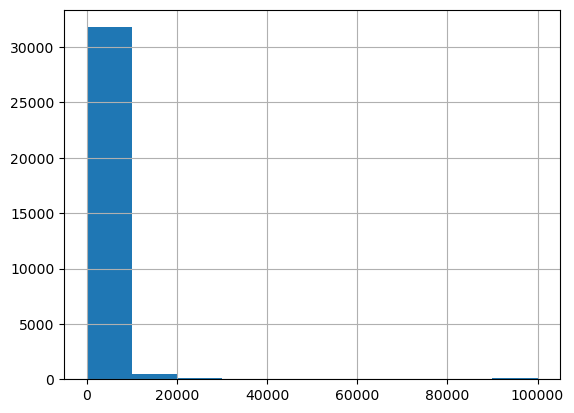

In [14]:
df['capital_gain'].hist()
df['capital_gain'].skew()

In [15]:
#Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

import numpy as np

# Select a skewed numerical feature
skewed_feature = 'capital_gain'

# Apply log transformation to the skewed feature
df['log_capital_gain'] = np.log(df[skewed_feature] + 1)

# Justification:
# The log transformation is a common method for transforming skewed numerical features. It compresses the range of values and reduces the influence of outliers. This can make the data more suitable for machine learning algorithms that assume normality.

# Additionally, the log transformation can be useful for interpreting the relationship between the transformed feature and other features in the dataset. For example, if we were to plot the log-transformed capital-gain feature against income, we might see a linear relationship, even if the relationship between the original capital-gain feature and income was non-linear.


In [16]:
df['log_capital_gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: log_capital_gain, Length: 32561, dtype: float64

# Feature Selection

In [18]:
#Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
#import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest

# Assuming 'df' is your DataFrame

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded features
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Now fit the Isolation Forest model
isolation_forest = IsolationForest(max_samples=100, random_state=42)
isolation_forest.fit(df)

# Identify outlier indices
outlier_indices = isolation_forest.predict(df)

# Remove outliers from the data
df_without_outliers = df[outlier_indices == 1]
df_without_outliers

,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,years_of_experience,log_capital_gain,education_ 10th,...,education_occupation_ Some-college_ Farming-fishing,education_occupation_ Some-college_ Handlers-cleaners,education_occupation_ Some-college_ Machine-op-inspct,education_occupation_ Some-college_ Other-service,education_occupation_ Some-college_ Priv-house-serv,education_occupation_ Some-college_ Prof-specialty,education_occupation_ Some-college_ Protective-serv,education_occupation_ Some-college_ Sales,education_occupation_ Some-college_ Tech-support,education_occupation_ Some-college_ Transport-moving
0,39,7,77516,13,2174,0,40,30.000000,7.684784,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,6,83311,13,0,0,13,12.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,4,215646,9,0,0,40,29.230769,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,4,234721,7,0,0,40,40.769231,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,4,338409,13,0,0,40,21.538462,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,0,0,38,19.730769,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,40,4,154374,9,0,0,40,30.769231,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,58,4,151910,9,0,0,40,44.615385,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,22,4,201490,9,0,0,20,8.461538,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
 #Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Check if 'income_<=50K' exists, if not try finding the correct target column
target_column = 'income_<=50K' 
if target_column not in df.columns:
    # Try to find the correct target column based on partial match
    potential_targets = [col for col in df.columns if 'income' in col]
    if potential_targets:
        target_column = potential_targets[0]
        print(f"Using '{target_column}' as target column. Please verify if this is correct.")
    else:
        raise ValueError("No income-related column found in the DataFrame. Please specify the correct target column.")

# Calculate the PPS for each feature
pps = mutual_info_classif(df, df[target_column])  # Use the identified target column

# Create a DataFrame to store the PPS scores
pps_df = pd.DataFrame({'feature': df.columns, 'pps': pps})

# Sort the DataFrame by PPS score
pps_df = pps_df.sort_values(by='pps', ascending=False)

# Print the top 5 features with the highest PPS scores
print("Top 5 features with highest PPS scores:")
print(pps_df.head(5))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Compare the findings of the PPS and correlation matrix
# - Identify features with high PPS scores but low correlation values
# - Identify features with low PPS scores but high correlation values
# - Discuss potential reasons for these differences

# Example:
print("\nFeatures with high PPS scores but low correlation values:")
high_pps_low_corr = pps_df[pps_df['pps'] > 0.5]
low_corr_features = []
for feature in high_pps_low_corr['feature']:
    if abs(correlation_matrix[feature][target_column]) < 0.3:  # Use the identified target column
        low_corr_features.append(feature)
print(low_corr_features)


Using 'income_ <=50K' as target column. Please verify if this is correct.
Top 5 features with highest PPS scores:
                                feature       pps
102                       income_ <=50K  0.559275
103                        income_ >50K  0.553148
27   marital_status_ Married-civ-spouse  0.105889
4                          capital_gain  0.083991
8                      log_capital_gain  0.082504

Correlation matrix:
                                                         age  workclass  \
age                                                 1.000000   0.003787   
workclass                                           0.003787   1.000000   
fnlwgt                                             -0.076646  -0.016656   
education_num                                       0.036527   0.052085   
capital_gain                                        0.077674   0.033835   
...                                                      ...        ...   
education_occupation_ Some-college_ Prof